In [3]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
#import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [10]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
#print(data['Sales'].values)
Y = data['Sales'].values.reshape(-1, 1)
#print(Y)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


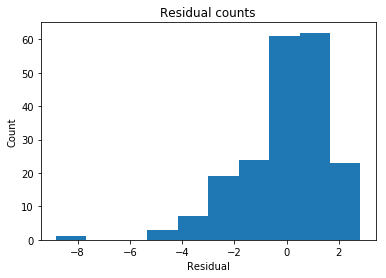

In [5]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


### Assumption three: homoscedasticity

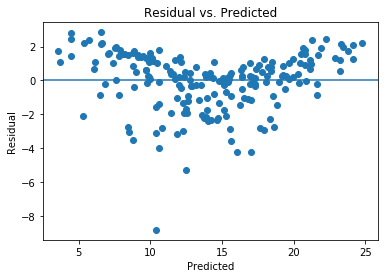

In [6]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


### Fix multivariate normality

R-squared of new Linear Regression model:
0.8912825999169766


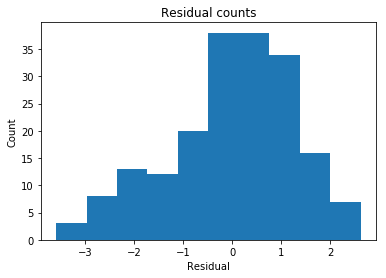

In [33]:
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted
data['Residual'] = residual

#create new dataset without outliers
no_outliers = data[data['Residual'] > -3]
no_outliers = no_outliers[no_outliers['Residual'] < 3]
# Instantiate and fit our model.
regr_2 = linear_model.LinearRegression()
#print(data['Sales'].values)
Y_2 = no_outliers['Sales'].values.reshape(-1, 1)
#print(Y)
X_2 = no_outliers[['TV','Radio','Newspaper']]
regr_2.fit(X_2, Y_2)

print('R-squared of new Linear Regression model:')
print(regr_2.score(X, Y))

# Extract predicted values.
predicted_2 = regr_2.predict(X_2).ravel()
actual_2 = no_outliers['Sales']

# Calculate the error, also called the residual.
residual_2 = actual_2 - predicted_2
no_outliers['Residual_2'] = residual_2

# This looks a bit concerning.
plt.hist(residual_2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Fix homoscedasticity

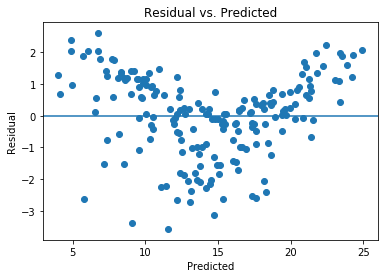

In [26]:
plt.scatter(predicted_2, residual_2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [29]:
no_outliers[no_outliers['Residual_2'] > 2]

,Unnamed: 0,TV,Radio,Newspaper,Sales,Residual,Residual_2
60,61,53.500,2.000,21.400,8.100,2.358,2.049
76,77,27.500,1.600,20.700,6.900,2.422,2.040
91,92,28.600,1.500,33.000,7.300,2.804,2.390
117,118,76.400,0.800,14.800,9.400,2.829,2.621
127,128,80.200,0.000,9.200,8.800,2.200,2.028
128,129,220.300,49.000,3.200,24.700,2.445,2.235
175,176,276.900,48.900,41.800,27.000,2.213,2.065


In [30]:
no_outliers[no_outliers['Residual'] < -2.4]

,Unnamed: 0,TV,Radio,Newspaper,Sales,Residual,Residual_2
102,103,280.200,10.100,21.400,14.800,-2.844,-2.543
131,132,265.200,2.900,43.000,12.700,-2.878,-2.615
132,133,8.400,27.200,2.100,5.700,-2.749,-3.386
135,136,48.300,47.000,8.500,11.600,-2.401,-3.129
166,167,17.900,37.600,21.600,8.000,-2.824,-3.591
169,170,284.300,10.600,6.400,15.000,-2.942,-2.589
188,189,286.000,13.900,3.700,15.900,-2.744,-2.411


In [31]:
no_outliers.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Residual,Residual_2
count,189.000,189.000,189.000,189.000,189.000,189.000,189.000
mean,101.698,150.807,22.915,30.001,14.372,0.243,-0.000
std,57.615,81.919,14.640,21.273,5.096,1.316,1.287
min,1.000,4.100,0.000,0.300,3.200,-2.942,-3.591
25%,52.000,76.400,10.000,12.800,10.600,-0.329,-0.772
50%,102.000,156.600,21.700,25.600,13.300,0.333,0.138
75%,151.000,218.500,35.600,43.300,18.000,1.255,0.951
max,200.000,296.400,49.600,114.000,27.000,2.829,2.621


### Findings
If one of the variables (TV, Radio, Newspaper) per data point has a value under 20% distribution or above the 80% distribution then the “residual” gets higher. 

That mean the current model has troubles predicting the sales outcome if the model input is composed like stated above. 